In [1]:
import pandas as pd
import statistics as states
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salary_survey.csv")

In [3]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#allowing Pandas to recognize corrupted values.
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("salary_survey.csv", na_values = missing_value_formats)

In [5]:
df.shape

(28178, 23)

In [6]:
df.dtypes

Timestamp                                                                                                                                                                                                                                object
How old are you?                                                                                                                                                                                                                         object
What industry do you work in?                                                                                                                                                                                                            object
Job title                                                                                                                                                                                                                                object
If your job title needs additional conte

In [7]:
df = df.rename(columns={
    "How old are you?":"Age",
    "What industry do you work in?":"Industry","Job title":"Job",
    "If your job title needs additional context, please clarify here:":"JobContext",
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Salary",
    "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.":"OvertimeBonus",
    "Please indicate the currency":"Currency",
    "If \"Other,\" please indicate the currency here: ":"OtherCurrency",
    "If your income needs additional context, please provide it here:":"IncomeContext",
    "How many years of professional work experience do you have overall?":"YerasWorkExperience",
    "How many years of professional work experience do you have in your field?": "FieldExperience",
    "What is your highest level of education completed?":"Education",
    "What is your gender?":"Gender",
    "What city do you work in?":"City",
    "What country do you work in?":"Country",
    "If you're in the U.S., what state do you work in?":"USState","Unnamed: 17":"U17","Unnamed: 18":"U18","Unnamed: 19":"U19",
    "Unnamed: 20":"U20","Unnamed: 21":"U21","Unnamed: 22":"U22",
})

In [8]:
df.head()

,Timestamp,Age,Industry,Job,JobContext,Salary,OvertimeBonus,Currency,OtherCurrency,IncomeContext,...,YerasWorkExperience,FieldExperience,Education,Gender,U17,U18,U19,U20,U21,U22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe(include=object) 

,Timestamp,Age,Industry,Job,JobContext,Salary,Currency,OtherCurrency,IncomeContext,Country,USState,City,YerasWorkExperience,FieldExperience,Education,Gender
count,28085,28085,28011,28083,7266,28085,28085,206,3043,28084,23059,27994,28085,28085,27863,27914
unique,25302,7,1220,14359,7003,4314,11,120,2979,378,135,4832,8,8,6,5
top,4/27/2021 11:56:18,25-34,Computing or Tech,Software Engineer,Fundraising,"60,000",USD,INR,Hourly,United States,California,Boston,11 - 20 years,11 - 20 years,College degree,Woman
freq,5,12661,4706,286,20,430,23395,11,4,9000,2610,772,9626,6539,13529,21376


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28178 entries, 0 to 28177
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            28085 non-null  object 
 1   Age                  28085 non-null  object 
 2   Industry             28011 non-null  object 
 3   Job                  28083 non-null  object 
 4   JobContext           7266 non-null   object 
 5   Salary               28085 non-null  object 
 6   OvertimeBonus        20780 non-null  float64
 7   Currency             28085 non-null  object 
 8   OtherCurrency        206 non-null    object 
 9   IncomeContext        3043 non-null   object 
 10  Country              28084 non-null  object 
 11  USState              23059 non-null  object 
 12  City                 27994 non-null  object 
 13  YerasWorkExperience  28085 non-null  object 
 14  FieldExperience      28085 non-null  object 
 15  Education            27863 non-null 

In [11]:
#droping columns that represent no relevent information
df.drop(columns=['JobContext', 'IncomeContext' ,'U17' ,'U18' ,'U19' ,'U20' ,'U21' ,'U22',
                 'Timestamp', 'OtherCurrency'], inplace=True)

In [12]:
df.head()

,Age,Industry,Job,Salary,OvertimeBonus,Currency,Country,USState,City,YerasWorkExperience,FieldExperience,Education,Gender
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman


In [13]:
df.tail(10)

,Age,Industry,Job,Salary,OvertimeBonus,Currency,Country,USState,City,YerasWorkExperience,FieldExperience,Education,Gender
28168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Setting the float format to display with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
#Almog Woldenberg (2018). Pandas convert data type from object to float. [online] Stack Overflow. 
#Available at: https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float.

In [15]:
# removing commas 
df["Salary"] = df["Salary"].str.replace(',', '', regex=False).astype(float)
#Almog Woldenberg (2018). Pandas convert data type from object to float. [online] Stack Overflow. 
#Available at: https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28178 entries, 0 to 28177
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  28085 non-null  object 
 1   Industry             28011 non-null  object 
 2   Job                  28083 non-null  object 
 3   Salary               28085 non-null  float64
 4   OvertimeBonus        20780 non-null  float64
 5   Currency             28085 non-null  object 
 6   Country              28084 non-null  object 
 7   USState              23059 non-null  object 
 8   City                 27994 non-null  object 
 9   YerasWorkExperience  28085 non-null  object 
 10  FieldExperience      28085 non-null  object 
 11  Education            27863 non-null  object 
 12  Gender               27914 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.8+ MB


In [17]:
df['Salary'] = df['Salary'].fillna(0)

In [18]:
print('Salary')
df['Salary'].head(10)

Salary


0    55000.00
1    54600.00
2    34000.00
3    62000.00
4    60000.00
5    62000.00
6    33000.00
7    50000.00
8   112000.00
9    45000.00
Name: Salary, dtype: float64

In [19]:
print('OvertimeBonus')
df['OvertimeBonus'].head(10)

OvertimeBonus


0       0.00
1    4000.00
2        NaN
3    3000.00
4    7000.00
5        NaN
6    2000.00
7        NaN
8   10000.00
9       0.00
Name: OvertimeBonus, dtype: float64

In [20]:
#replace missing values in the OvertimeBonus column with 0.
df['OvertimeBonus'] = df['OvertimeBonus'].fillna(0)

In [21]:
print('OvertimeBonus')
df['OvertimeBonus'].head(10)

OvertimeBonus


0       0.00
1    4000.00
2       0.00
3    3000.00
4    7000.00
5       0.00
6    2000.00
7       0.00
8   10000.00
9       0.00
Name: OvertimeBonus, dtype: float64

In [22]:
# check if there are any NaN values in dataset
print(df.isnull().sum())

Age                      93
Industry                167
Job                      95
Salary                    0
OvertimeBonus             0
Currency                 93
Country                  94
USState                5119
City                    184
YerasWorkExperience      93
FieldExperience          93
Education               315
Gender                  264
dtype: int64


In [23]:
#droping all raws and columns with Nan values
new_df = df.dropna(axis=0)
new_df = df.dropna(axis=1)

In [24]:
no_mis_df = df.dropna(axis=0)

In [25]:
no_mis_df = df.dropna(axis=1)

In [26]:
no_mis_df.duplicated().sum()

18960

In [27]:
no_mis_df.drop_duplicates(keep = "first", inplace = True) 

C:\Users\Rafał\AppData\Local\Temp\ipykernel_7108\3862673961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_mis_df.drop_duplicates(keep = "first", inplace = True)


In [28]:
df=df.dropna()
df.count()

Age                    22691
Industry               22691
Job                    22691
Salary                 22691
OvertimeBonus          22691
Currency               22691
Country                22691
USState                22691
City                   22691
YerasWorkExperience    22691
FieldExperience        22691
Education              22691
Gender                 22691
dtype: int64

In [29]:
df.isnull().sum()

Age                    0
Industry               0
Job                    0
Salary                 0
OvertimeBonus          0
Currency               0
Country                0
USState                0
City                   0
YerasWorkExperience    0
FieldExperience        0
Education              0
Gender                 0
dtype: int64

In [30]:
#check the number of duplicated values
duplicate_count = df.duplicated().sum()  # Correct usage
print('Number of duplicated rows:', duplicate_count)

Number of duplicated rows: 138


In [31]:
df = df.drop_duplicates()
df.head(5)

,Age,Industry,Job,Salary,OvertimeBonus,Currency,Country,USState,City,YerasWorkExperience,FieldExperience,Education,Gender
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000.00,0.00,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.00,0.00,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,25-34,Nonprofits,Program Manager,62000.00,3000.00,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.00,7000.00,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000.00,0.00,USD,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man


In [32]:
average_salary = df.groupby('Currency')['Salary'].mean().reset_index()

In [33]:
print(average_salary)

  Currency     Salary
0  AUD/NZD   30000.00
1      CAD  122922.40
2      EUR  100150.00
3      GBP   49000.00
4      JPY 3600000.00
5    Other   74792.92
6      SEK   28000.00
7      USD   92038.96


In [34]:
data = {
    "Currency": [
        "AUD/NZD", 
        "CAD", 
        "EUR", 
        "GBP",
        "JPY", 
        "Other", 
        "SEK", 
        "USD"
    ],
    'Count': [
        30000.00, 
        122922.40, 
        100150.00, 
        49000.00, 
        3600000.00,
        74792.92,
        28000.00,
        92038.96
        
        
    ]
}

In [35]:
#creating currency dataset
df_Currency = pd.DataFrame(data)

In [36]:
#defining currency exchange rates
exchange_rates = {
        "AUD/NZD": 0.75, 
        "CAD": 0.78,
        "EUR":1.1,
        "GBP":1.3,
        "JPY":0.0075,
        "Other":1.0,
        "SEK":0.1,
        "USD":1.0
}

In [37]:
#converting all currencies to USD
def convert_to_usd(row):
    currency = row['Currency']
    amount = row['Salary']
    return amount * exchange_rates[currency]

#NARAYAN (2021). How to convert currency in a database using pandas. [online] Stack Overflow. 
#Available at: https://stackoverflow.com/questions/68103246/how-to-convert-currency-in-a-database-using-pandas?newreg=7c3b944f0db149fb9953d6186c190978.

In [38]:
df['Salary_in_USD'] = df.apply(convert_to_usd, axis=1)

In [39]:
df['Salary'].describe()

count     22553.00
mean      92185.35
std       82619.85
min           0.00
25%       56000.00
50%       78000.00
75%      112000.00
max     5000044.00
Name: Salary, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


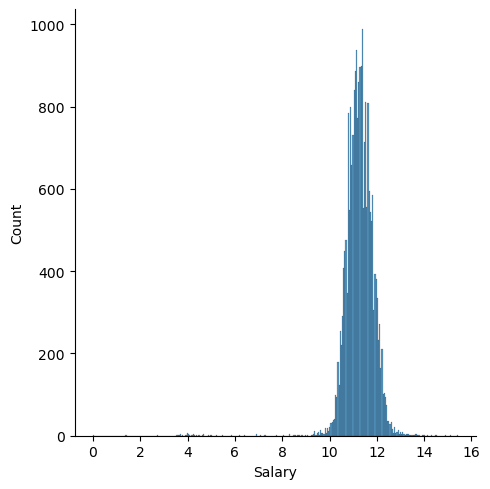

In [40]:
##ploting salary distribution
sns.displot(np.log(df.Salary))

<Axes: xlabel='Salary'>

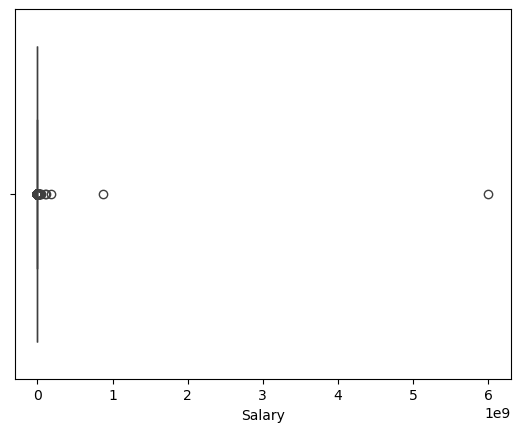

In [41]:
sns.boxplot(data=no_mis_df, x="Salary")

In [42]:
import numpy as np

Q1 = no_mis_df["Salary"].quantile(0.25)
Q3 = no_mis_df["Salary"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3 + 1.5*IQR


# Create arrays of Boolean values indicating the outlier rows

upper_array = np.where(no_mis_df["Salary"]>=upper)[0]
lower_array = np.where(no_mis_df["Salary"]<=lower)[0]


In [43]:
lower = Q1-1.5*IQR
upper = Q3 + 1.5*IQR

no_mis_df["Salary"] = np.where(
          no_mis_df["Salary"] > upper, 
          upper, 
          np.where(
              no_mis_df["Salary"] < lower, 
              lower, 
              no_mis_df["Salary"])
          )


<Axes: xlabel='Salary'>

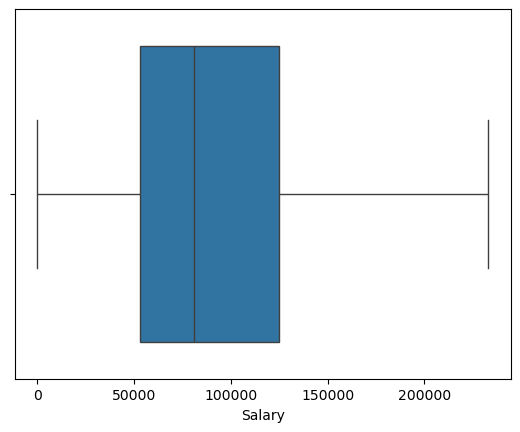

In [44]:
sns.boxplot(data=no_mis_df, x="Salary")

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


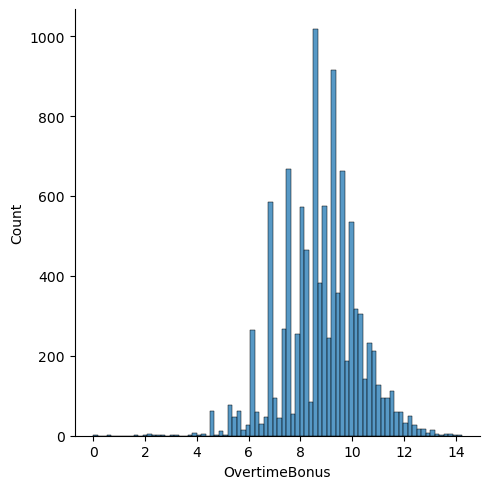

In [45]:
sns.displot(np.log(df.OvertimeBonus))

<Axes: xlabel='OvertimeBonus'>

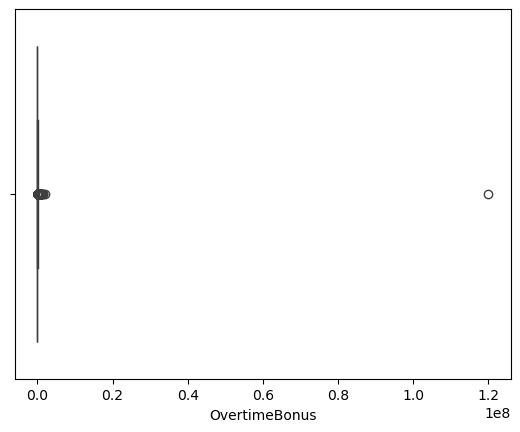

In [46]:
sns.boxplot(data=no_mis_df, x="OvertimeBonus")

In [47]:
import numpy as np

Q1 = no_mis_df["OvertimeBonus"].quantile(0.25)
Q3 = no_mis_df["OvertimeBonus"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1-1.5*IQR
upper = Q3 + 1.5*IQR


# Create arrays of Boolean values indicating the outlier rows

upper_array = np.where(no_mis_df["OvertimeBonus"]>=upper)[0]
lower_array = np.where(no_mis_df["OvertimeBonus"]<=lower)[0]


In [48]:
# Removing the outliers

lower = Q1-1.5*IQR
upper = Q3 + 1.5*IQR

no_mis_df["OvertimeBonus"] = np.where(
          no_mis_df["OvertimeBonus"] > upper, 
          upper, 
          np.where(
              no_mis_df["OvertimeBonus"] < lower, 
              lower, 
              no_mis_df["OvertimeBonus"])
          )


<Axes: xlabel='OvertimeBonus'>

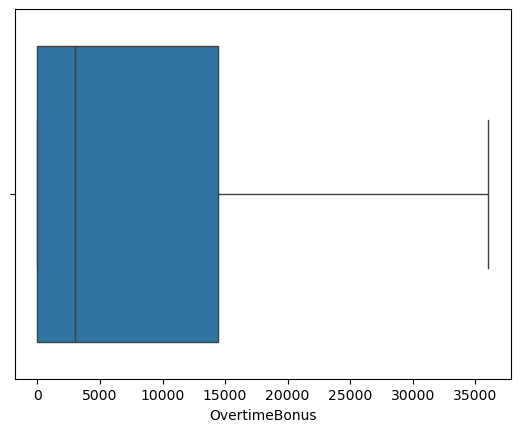

In [49]:
sns.boxplot(data=no_mis_df, x="OvertimeBonus")

In [50]:
no_mis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9218 entries, 0 to 28080
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Salary         9218 non-null   float64
 1   OvertimeBonus  9218 non-null   float64
dtypes: float64(2)
memory usage: 216.0 KB


In [51]:
df.Gender.value_counts()


Gender
Woman                            17567
Man                               4170
Non-binary                         589
Other or prefer not to answer      226
Prefer not to answer                 1
Name: count, dtype: int64

In [52]:
data = {
    'Gender': [
        'Woman', 
        'Man', 
        'Non-binary', 
        'Other or prefer not to answer', 
        'Prefer not to answer'
    ],
    'Count': [
        17567, 
        4170, 
        589, 
        226, 
        1
    ]
}

In [53]:
df_gender = pd.DataFrame(data)

In [54]:
df['Gender'] = df['Gender'].replace({"Other or prefer not to answer": "Other", "Prefer not to answer": "NoAnswer"})

In [55]:
print(df_gender)

                          Gender  Count
0                          Woman  17567
1                            Man   4170
2                     Non-binary    589
3  Other or prefer not to answer    226
4           Prefer not to answer      1


In [56]:
total_count = df_gender['Count'].sum()

In [57]:
df_gender['Percentage'] = (df_gender['Count'] / total_count) * 100

In [58]:
print(df_gender)

                          Gender  Count  Percentage
0                          Woman  17567       77.89
1                            Man   4170       18.49
2                     Non-binary    589        2.61
3  Other or prefer not to answer    226        1.00
4           Prefer not to answer      1        0.00


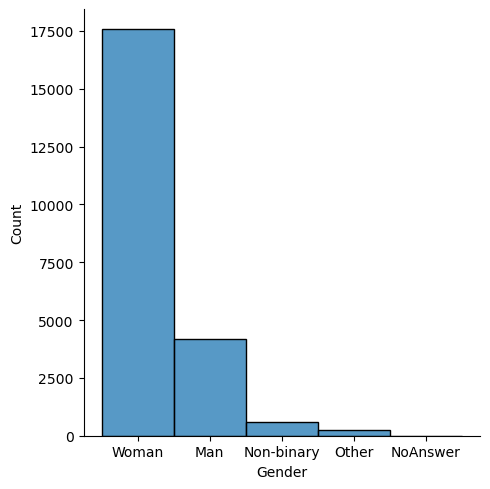

In [59]:
sns.displot(df.Gender)

In [60]:
# calculating avarage salary by gender
average_salary = df.groupby('Gender')['Salary'].mean().reset_index()

#Stack Overflow. (n.d.). python - pandas: return average of multiple columns. [online]
#Available at: https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns.

In [61]:
print(average_salary)

       Gender    Salary
0         Man 113928.79
1    NoAnswer  88000.00
2  Non-binary  89784.15
3       Other  94767.00
4       Woman  87071.49


In [62]:
data = {
    'Gender': [
        'Man', 
        'NoAnswer', 
        'Non-binary', 
        'Other', 
        'Woman'
    ],
    'Count': [
        113930.77, 
        88000.00, 
        83717.94, 
        94767.00, 
        87064.58
    ]
}

Text(0.5, 1.0, 'Average Salary by Gender')

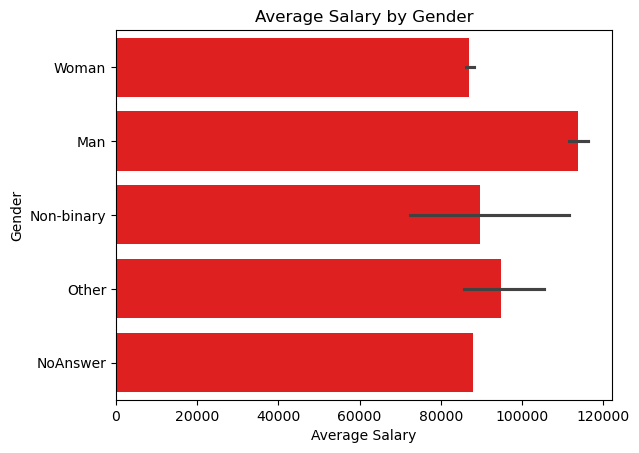

In [63]:
sns.barplot(x='Salary', y='Gender', data=df, color="r")
plt.xlabel('Average Salary')
plt.ylabel('Gender')
plt.title('Average Salary by Gender')

In [64]:
data = {
    'Education': [
        'College', 
        'Mastere', 
        'Some college', 
        'Professionalr', 
        'PhD',
        'High School'
    ],
    'Count': [
        87101.52, 
        85414.23, 
        92925.46, 
        112515.54, 
        141359.05,
        77820.69
    ]
}

In [65]:
df_Education = pd.DataFrame(data)

In [66]:
df.Education.value_counts()

Education
College degree                        11084
Master's degree                        7280
Some college                           1604
Professional degree (MD, JD, etc.)     1111
PhD                                    1083
High School                             391
Name: count, dtype: int64

In [67]:
df['Education'] = df['Education'].replace({"College degree": "College", "Master's degree": "Master",
                                           "Professional degree (MD, JD, etc.)": "Professional"})

In [68]:
df.Education.value_counts()

Education
College         11084
Master           7280
Some college     1604
Professional     1111
PhD              1083
High School       391
Name: count, dtype: int64

In [69]:
total_count = df_Education['Count'].sum()

In [87]:
df_Education['Percentage'] = (df_Education['Count'] / total_count) * 100

In [88]:
print(df_Education)

       Education     Count  Percentage
0        College  87101.52       14.59
1        Mastere  85414.23       14.30
2   Some college  92925.46       15.56
3  Professionalr 112515.54       18.84
4            PhD 141359.05       23.67
5    High School  77820.69       13.03


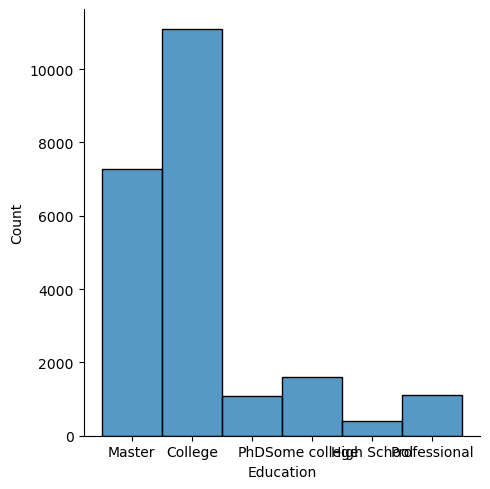

In [72]:
sns.displot(df.Education)

In [73]:
total_count = df_Education['Count'].sum()

In [74]:
average_salary = df.groupby('Education')['Salary'].mean().reset_index()

In [75]:
print(average_salary)

      Education    Salary
0       College  87101.52
1   High School  85414.23
2        Master  92925.46
3           PhD 112515.54
4  Professional 141359.05
5  Some college  77820.69


Text(0.5, 1.0, 'Average Salary by Education Level')

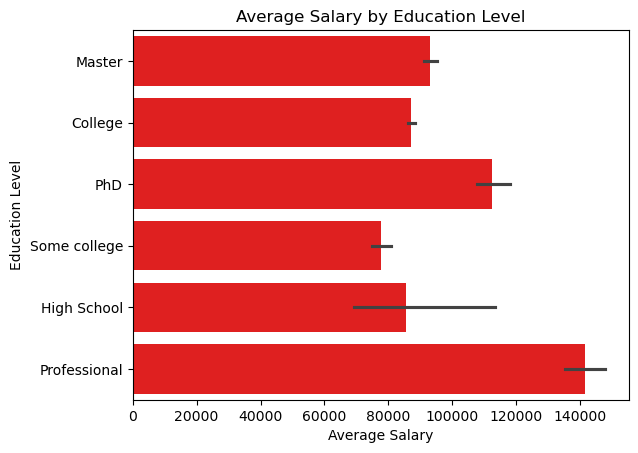

In [76]:
sns.barplot(x='Salary', y='Education', data=df, color="r")
plt.xlabel('Average Salary')
plt.ylabel('Education Level')
plt.title('Average Salary by Education Level')

In [77]:
df_Industry = pd.DataFrame(data)

In [78]:
df.Industry.value_counts()

Industry
Computing or Tech                                3646
Nonprofits                                       2082
Education (Higher Education)                     2021
Health care                                      1593
Accounting, Banking & Finance                    1434
                                                 ... 
Food processing                                     1
Architectural/Land Planning/Civil Engineering       1
Gaming (Gambling)                                   1
Manufacturing : corporate admin support             1
Social networks                                     1
Name: count, Length: 1025, dtype: int64

In [79]:
total_count = df_Industry['Count'].sum()

In [80]:
average_salary = df.groupby('Industry')['Salary'].mean().reset_index()

In [81]:
print(average_salary)

                                Industry    Salary
0                                  Buyer  76650.00
1                    Veterinary medicine 155000.00
2     "Government Relations" (Lobbying)   65000.00
3                        Academia - STEM  32000.00
4                    Academia / Research  68500.00
...                                  ...       ...
1020                     technology/SaaS  87500.00
1021                   trade association 195000.00
1022        trade association/membership  65100.00
1023                  veterinary biotech  89000.00
1024              wholesale distribution  87335.33

[1025 rows x 2 columns]


In [82]:
data = {
    'Industry': [
        'Buyer',
        'Veterinary medicine', 
        '"Government Relations" (Lobbying)', 
        'Academia - STEM', 
        'Academia / Research', 
        ' technology/SaaS',
        'trade association',
        'trade association/membershiph',
        'veterinary biotech',
        'wholesale distribution'  
    ],
    'Count': [
        76650.00, 
        155000.00, 
         65000.00, 
        32000.00, 
         68500.00,
        87500.00,
        195000.00,
        65100.00,
        89000.00,
        87335.33
    ]
}

In [83]:
df = pd.DataFrame(data)

In [84]:
print(df)

                            Industry     Count
0                              Buyer  76650.00
1                Veterinary medicine 155000.00
2  "Government Relations" (Lobbying)  65000.00
3                    Academia - STEM  32000.00
4                Academia / Research  68500.00
5                    technology/SaaS  87500.00
6                  trade association 195000.00
7      trade association/membershiph  65100.00
8                 veterinary biotech  89000.00
9             wholesale distribution  87335.33


Text(0.5, 1.0, 'Average Salary by Education Level')

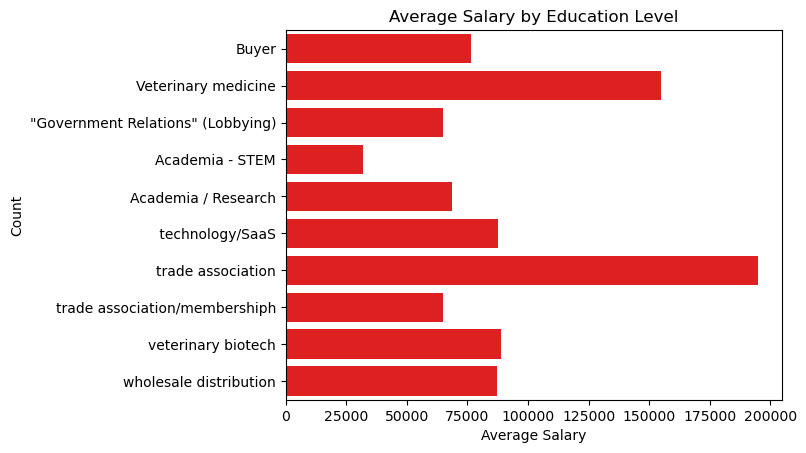

In [85]:
sns.barplot(x='Count', y='Industry', data=df, color="r")
plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.title('Average Salary by Education Level')